#1. Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls -al '/gdrive/My Drive/data'

total 2193336
-rw------- 1 root root    337847 Feb  2 11:56 data_202001.csv
-rw------- 1 root root    314682 Feb  2 10:30 data_202002.csv
-rw------- 1 root root    335953 Feb  2 10:35 data_202003.csv
-rw------- 1 root root    988308 Feb  2 11:58 data_2020.csv
-rw------- 1 root root   9453240 Aug  7  2019 marathon_2015_2017.csv
-rw------- 1 root root   4228123 Apr 29  2017 marathon_results_2015.csv
-rw------- 1 root root   4244383 Apr 29  2017 marathon_results_2016.csv
-rw------- 1 root root   4196246 Apr 29  2017 marathon_results_2017.csv
-rw------- 1 root root 783889122 Jan 30 17:16 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Jan 31 06:59 TCS_영업소간통행시간_1시간_1개월_202003


#2. Korean Characters

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [ ]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

#3. Load Data

In [ ]:
import pandas as pd

In [ ]:
# Load a file under "data" folder
file = "/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [ ]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


#4. 집계시

In [ ]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [ ]:
# Create data_06_22 Dataframe with counting by 집계시
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
25164,20200302,6,101,110,2772,0
22064,20200213,6,101,130,8044,3
12199,20200130,6,101,115,6542,3
6518,20200117,6,101,105,806,4
28006,20200309,6,101,115,7670,0
...,...,...,...,...,...,...
15006,20200207,22,101,105,991,4
16139,20200209,22,101,130,9075,6
28346,20200310,22,101,115,4747,1
16141,20200209,22,101,130,7947,6


In [ ]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [ ]:
data_06_22_counting

14    1766
12    1758
15    1755
13    1754
11    1744
10    1725
16    1724
17    1719
9     1703
18    1666
8     1662
19    1628
20    1611
7     1585
21    1559
22    1505
6     1440
Name: 집계시, dtype: int64

In [ ]:
data_06_22_counting_sorted = data_06_22_counting.sort_index()

In [ ]:
data_06_22_counting_sorted

6     1440
7     1585
8     1662
9     1703
10    1725
11    1744
12    1758
13    1754
14    1766
15    1755
16    1724
17    1719
18    1666
19    1628
20    1611
21    1559
22    1505
Name: 집계시, dtype: int64

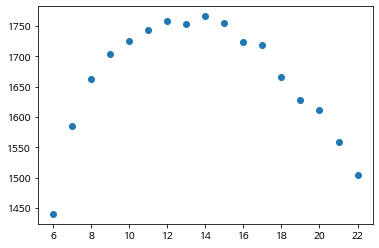

In [ ]:
plt.scatter(data_06_22_counting_sorted.index, data_06_22_counting_sorted.values)

In [ ]:
data_06_22

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
10,20200101,10,101,105,686,2
11,20200101,10,101,105,761,2
12,20200101,10,101,105,704,2
13,20200101,10,101,105,807,2
14,20200101,10,101,105,687,2
...,...,...,...,...,...,...
37348,20200331,6,101,115,6938,1
37349,20200331,17,101,135,12477,1
37351,20200331,10,101,105,885,1
37352,20200331,8,101,140,13403,1


In [ ]:
data_06_22_time = data_06_22['통행시간']

In [ ]:
data_06_22_time

10         686
11         761
12         704
13         807
14         687
         ...  
37348     6938
37349    12477
37351      885
37352    13403
37354     3598
Name: 통행시간, Length: 28304, dtype: int64

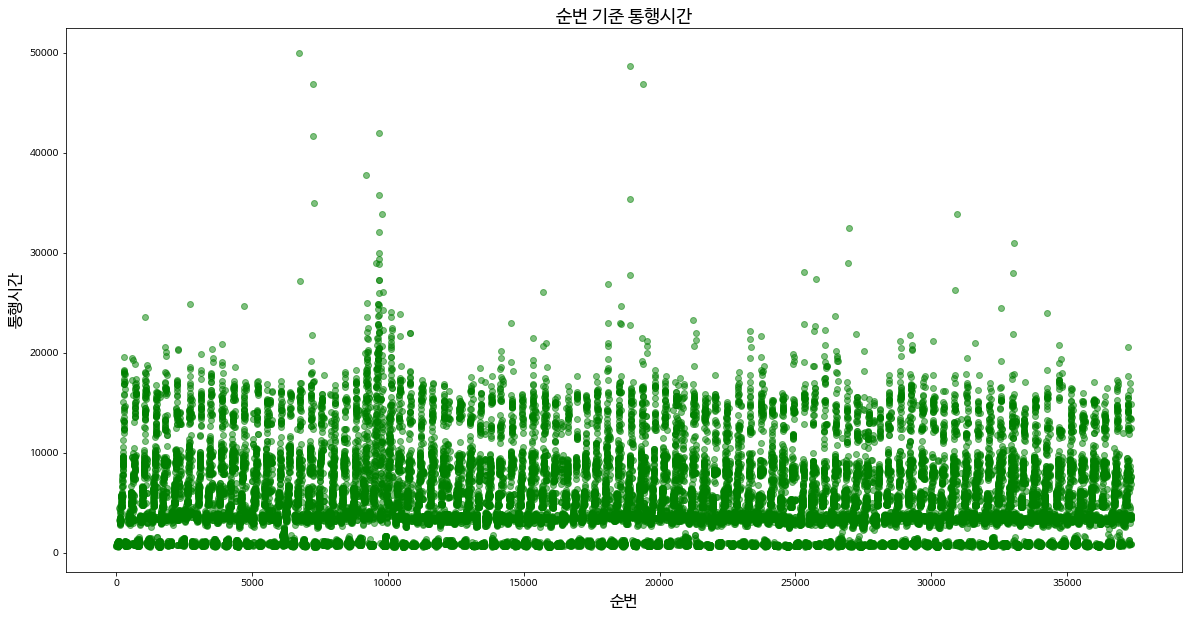

In [ ]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae scatter Chart
plt.scatter(data_06_22_time.index, data_06_22_time.values, c="g", alpha=0.5)
# Generate labels and title
plt.title("순번 기준 통행시간",fontsize=18)
plt.xlabel('순번', fontdict= {'size':16})
plt.ylabel('통행시간', fontdict= {'size':16})
# Show plot
plt.show()

In [22]:
data_days = data.groupby(by=['집계일자']).mean()

In [23]:
data_days

,집계시,출발영업소코드,도착영업소코드,통행시간,요일
집계일자,,,,,
20200101,12.070707,101.0,114.785354,5241.186869,2.0
20200102,12.179245,101.0,113.985849,4776.393868,3.0
20200103,11.780702,101.0,115.230263,5351.916667,4.0
20200104,11.694030,101.0,114.838308,5206.171642,5.0
20200105,12.508333,101.0,115.263889,5266.744444,6.0
...,...,...,...,...,...
20200327,12.363409,101.0,113.771930,4584.248120,4.0
20200328,11.332506,101.0,114.540943,4858.759305,5.0
20200329,12.288312,101.0,114.779221,4668.493506,6.0


In [24]:
data_days_time = data_days['통행시간']

In [25]:
data_days_time

집계일자
20200101    5241.186869
20200102    4776.393868
20200103    5351.916667
20200104    5206.171642
20200105    5266.744444
               ...     
20200327    4584.248120
20200328    4858.759305
20200329    4668.493506
20200330    4644.770833
20200331    4409.579710
Name: 통행시간, Length: 91, dtype: float64

In [26]:
# Store index of data_06_22_counting into x
x = data_days_time.index

In [27]:
labels = [str(i) for i in x]

In [28]:
labels

['20200101',
 '20200102',
 '20200103',
 '20200104',
 '20200105',
 '20200106',
 '20200107',
 '20200108',
 '20200109',
 '20200110',
 '20200111',
 '20200112',
 '20200113',
 '20200114',
 '20200115',
 '20200116',
 '20200117',
 '20200118',
 '20200119',
 '20200120',
 '20200121',
 '20200122',
 '20200123',
 '20200124',
 '20200125',
 '20200126',
 '20200127',
 '20200128',
 '20200129',
 '20200130',
 '20200131',
 '20200201',
 '20200202',
 '20200203',
 '20200204',
 '20200205',
 '20200206',
 '20200207',
 '20200208',
 '20200209',
 '20200210',
 '20200211',
 '20200212',
 '20200213',
 '20200214',
 '20200215',
 '20200216',
 '20200217',
 '20200218',
 '20200219',
 '20200220',
 '20200221',
 '20200222',
 '20200223',
 '20200224',
 '20200225',
 '20200226',
 '20200227',
 '20200228',
 '20200229',
 '20200301',
 '20200302',
 '20200303',
 '20200304',
 '20200305',
 '20200306',
 '20200307',
 '20200308',
 '20200309',
 '20200310',
 '20200311',
 '20200312',
 '20200313',
 '20200314',
 '20200315',
 '20200316',
 '20200317',

In [29]:
# Store values of data_days_time into values
values = data_days_time.values

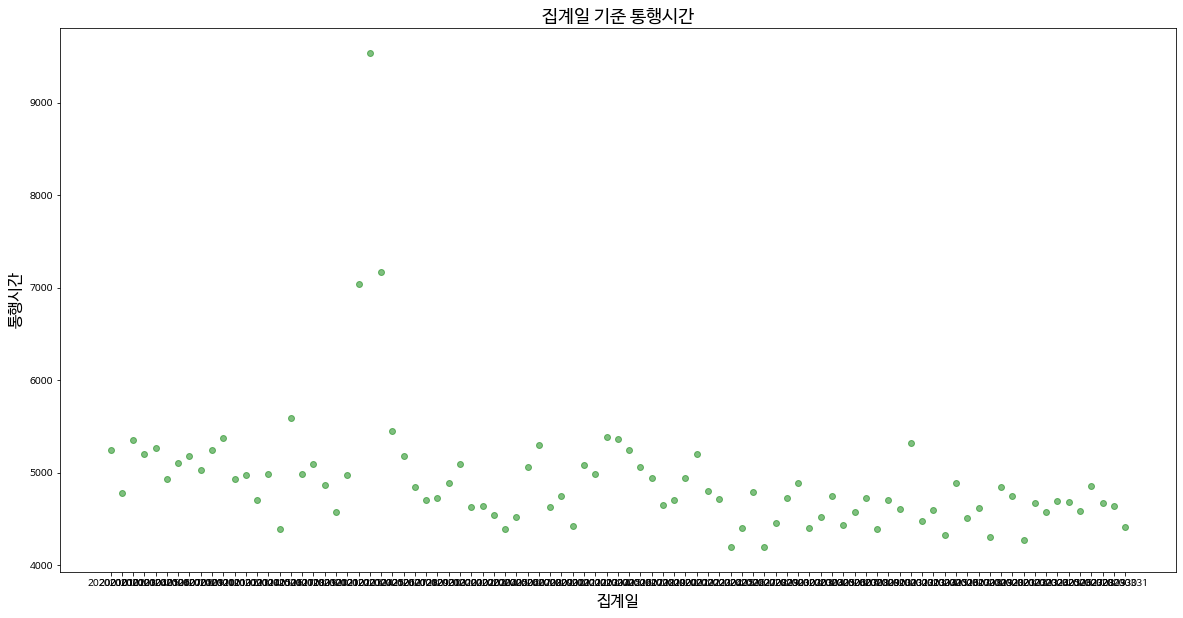

In [30]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae pie Chart
plt.scatter(labels, values, c="g", alpha=0.5)
# Generate labels and title
plt.title("집계일 기준 통행시간",fontsize=18)
plt.xlabel('집계일', fontdict= {'size':16})
plt.ylabel('통행시간', fontdict= {'size':16})
# Show plot
plt.show()

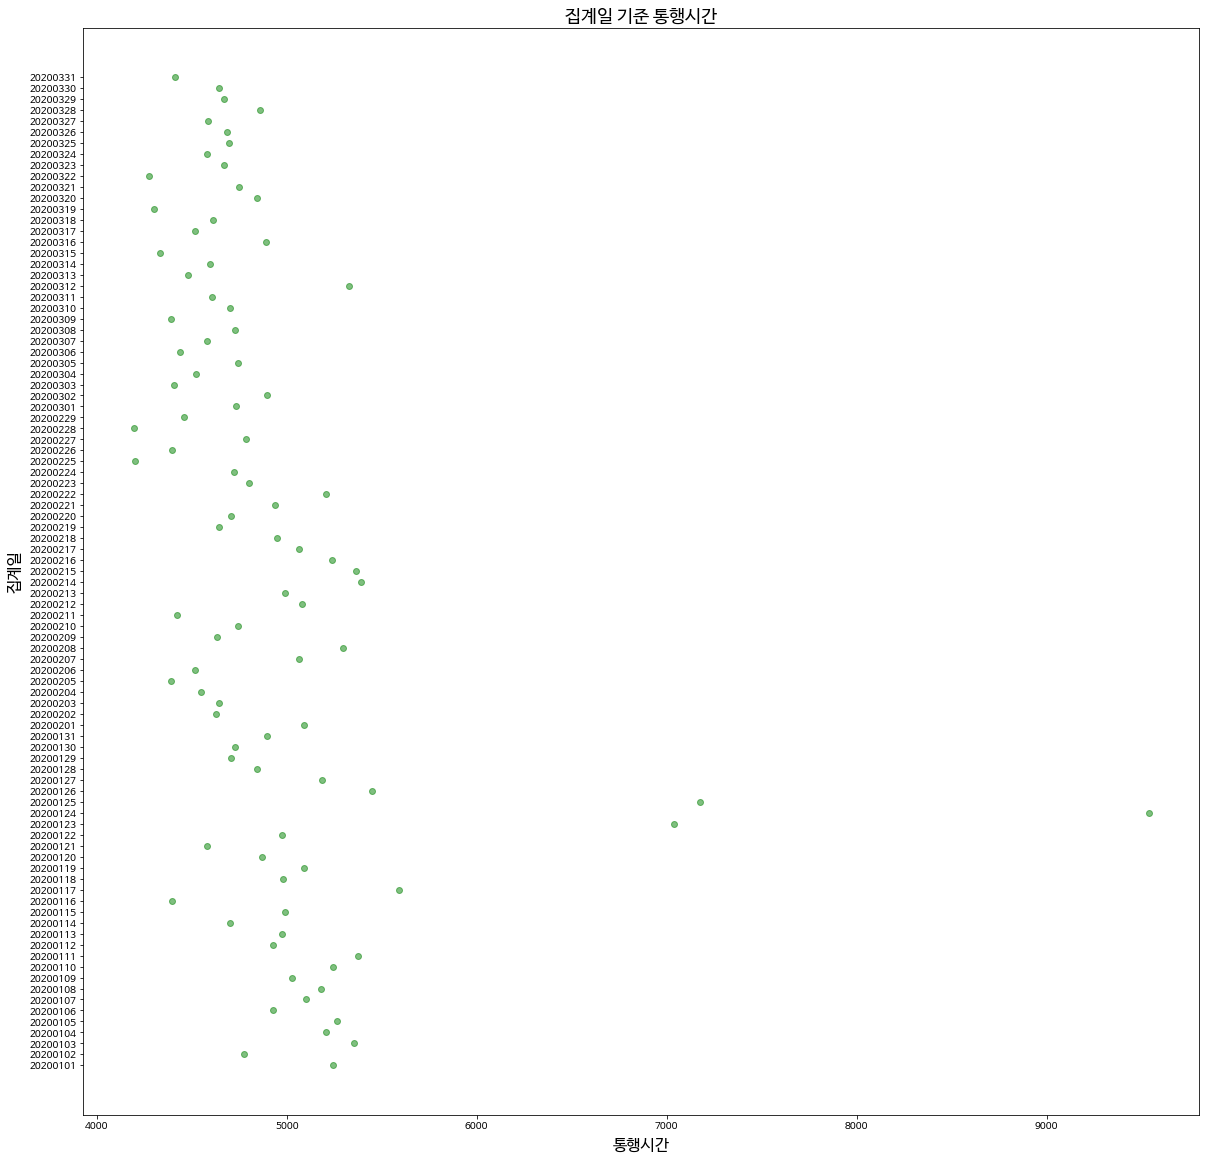

In [32]:
# Configure figure size
plt.figure(figsize=(20,20))
# Creae pie Chart
plt.scatter(values, labels, c="g", alpha=0.5)
# Generate labels and title
plt.title("집계일 기준 통행시간",fontsize=18)
plt.xlabel('통행시간', fontdict= {'size':16})
plt.ylabel('집계일', fontdict= {'size':16})
# Show plot
plt.show()

In [44]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
data_110_days = data[data['도착영업소코드'] == 110].groupby(by=['집계일자']).mean()
data_125_days = data[data['도착영업소코드'] == 125].groupby(by=['집계일자']).mean()
data_140_days = data[data['도착영업소코드'] == 140].groupby(by=['집계일자']).mean()

In [45]:
data_110_days_time = data_110_days['통행시간']
data_125_days_time = data_125_days['통행시간']
data_140_days_time = data_140_days['통행시간']

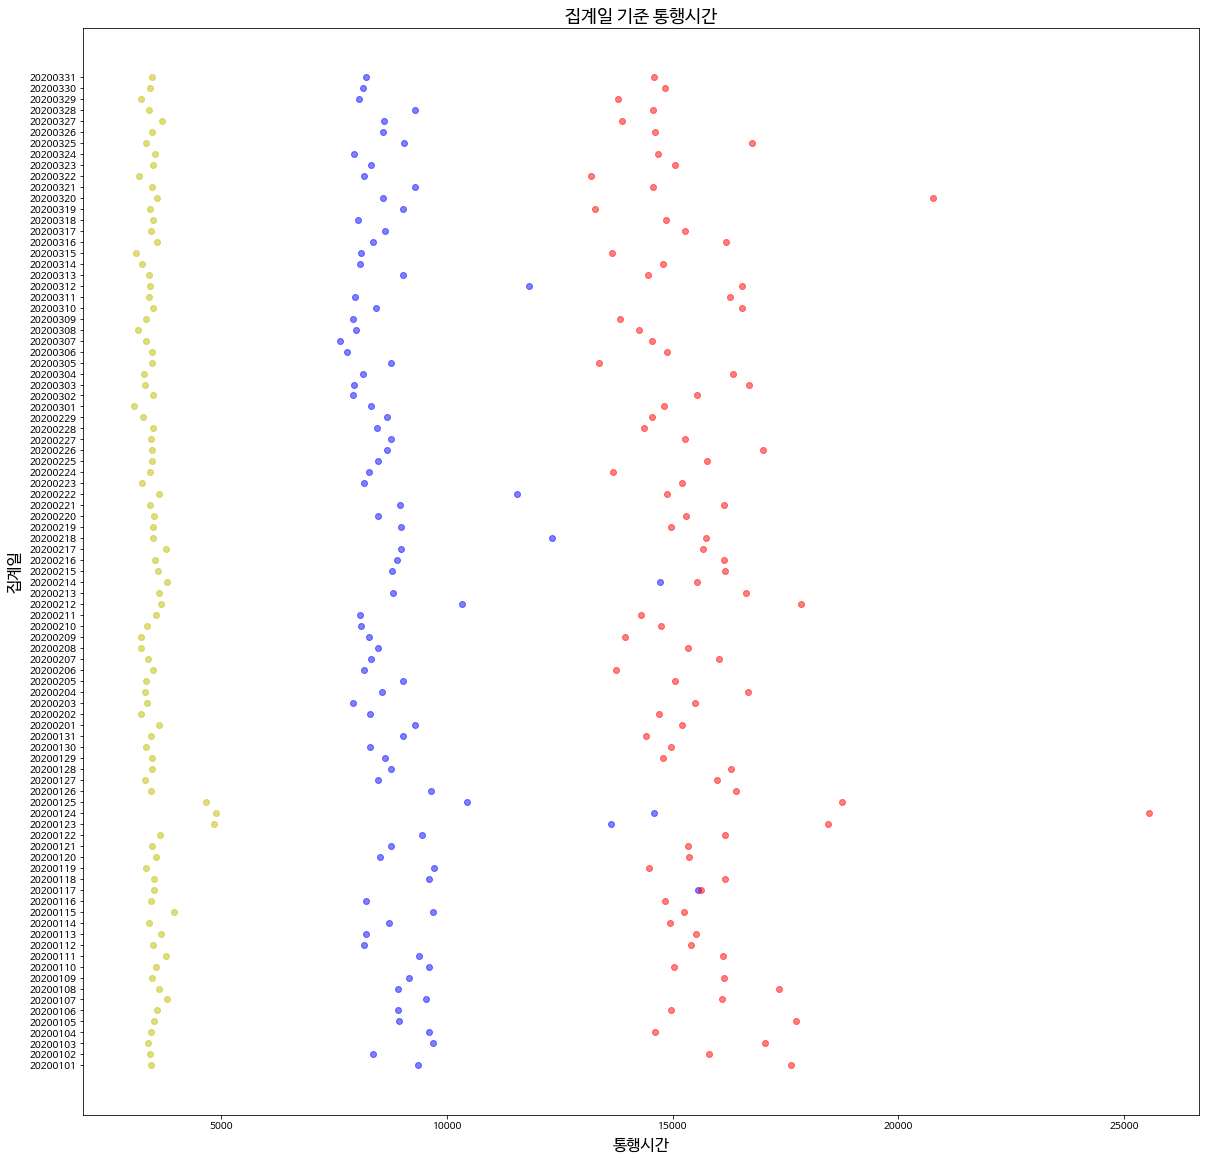

In [46]:
# Configure figure size
plt.figure(figsize=(20,20))
# Creae pie Chart
plt.scatter(data_110_days_time.values, labels, c="y", alpha=0.5)
plt.scatter(data_130_days_time.values, labels, c="b", alpha=0.5)
plt.scatter(data_140_days_time.values, labels, c="r", alpha=0.5)
# Generate labels and title
plt.title("집계일 기준 통행시간",fontsize=18)
plt.xlabel('통행시간', fontdict= {'size':16})
plt.ylabel('집계일', fontdict= {'size':16})
# Show plot
plt.show()